# **Data Sci Eng Methods**

Assignment 1 – ML Data Cleaning and Feature Selection



**Link to the Dataset: https://github.com/Tanmayjoshi-3601/INFO6105.git**


In this assignment, you will use a dataset for predictive learning and check the quality of the data and determine which features are important.

Answer the following questions:

* What are the data types? (Only numeric and categorical)

* Are there missing values?

* What are the likely distributions of the numeric variables?

* Which independent variables are useful to predict a target (dependent variable)? (Use at least three methods)

* Which independent variables have missing data? How much? 

* Do the training and test sets have the same data?

* In the predictor variables independent of all the other predictor variables?

* Which predictor variables are the most important?

* Do the ranges of the predictor variables make sense?

* What are the distributions of the predictor variables?   

* Remove outliers and keep outliers (does if have an effect of the final predictive model)?

* Remove 1%, 5%, and 10% of your data randomly and impute the values back using at least 3 imputation methods. How well did the methods recover the missing values?  That is remove some data, check the % error on residuals for numeric data and check for bias and variance of the error.

For categorical data, calculate the accuracy and a confusion matrix.

 

There is an example notebook for assignment one here 

 https://github.com/aiskunks/YouTube/blob/main/A_Crash_Course_in_Statistical_Learning/ML_Data_Cleaning_and_Feature_Selection/ML_Data_Cleaning_and_Feature_Selection_Abalone.ipynbLinks to an external site.

Imputation Methods for Missing Data
https://www.youtube.com/watch?v=fYhr8eF1uboLinks to an external site.

Nice EDA notebook https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-pythonLinks to an external site.



# Abstract

We apply various data preprocessing and machine learning techniques to handle the data and select the best features on the adult census income dataset. The dataset contains various socio-economic features like education, married-status, age etc. The objective of the dataset is to predict whether an individual annual income is more than 50k or less than 50k. Hence, this is a binary classification problem. In this notebook, we will do a thorough analysis of the dataset, data preprocessing, handling missing values, applying various machine learning models. We also encounter the case of data imbalance in this dataset. This notebook involves use of SMOTE to handle data imbalance. We also use various barplots, histplots, pairplots and various statistical visualizations to get a better understanding of data distributions. This notebook is based on applying data science engineering methods on a real world machine learning problem.

# Dataset

The dataset consists of :
1. Total 15 columns both categorical and numerical
2. There are 6 numerical columns and 9 categorical columns.

    The numerical columns are:


    1.   age
    2.   fnlwgt
    3.   education.num
    4.   capital.gain
    5.   capital.loss
    6.   hours.per.week

    The categorical columns are:

    1.  workclass
    2.  education
    3.  marital.status
    4.  occupation
    5.  relationship
    6.  race
    7.  sex
    8.  native.country
    9.  income
3. This dataset contains 32561 records.
4. The dependent variable is income. It has two types of values <=50k and >50k making it a binary classification problem.

In [1]:
!pip install xgboost

In [2]:
!pip install imblearn

In [3]:
pip install -U scikit-learn

Requirement already up-to-date: scikit-learn in e:\anaconda\install\lib\site-packages (1.3.1)
Note: you may need to restart the kernel to use updated packages.


In [4]:
# importing neccessary libraries

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
%matplotlib inline


In [5]:
# reading the dataset

df = pd.read_csv("adult.csv")
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [6]:
# w# checking the shape of the dataframe
df.shape

(32561, 15)

Now we will check the datatypes of the columns whether they are numerical or categorical.

In [7]:
# printing all the datatypes of respective columns
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income            object
dtype: object

As we can see there are 6 numerical columns and 9 categorical columns.

The numerical columns are:


1.   age
2.   fnlwgt
3.   education.num
4.   capital.gain
5.   capital.loss
6.   hours.per.week

The categorical columns are:

1.  workclass
2.  education
3.  marital.status
4.  occupation
5.  relationship
6.  race
7.  sex
8.  native.country
9.  income



**Overview of missing values**

In [8]:
# checking for missing values
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

Now looking at the output of missing values, there are none but while we print the first 5 rows of the dataset, there seem to be some values having '?'. So lets see how many values have '?' as their current value.

In [9]:
# counting the number of values having '?' in the dataset
count = (df=='?').sum().sum()
print(count)

4262


From the output it seems there are 4262 '?' values. Hence we need to replace them by nan to extract the missing values.

In [10]:
# Replacing '? with nan to identify missing values
df.replace('?',np.nan, inplace = True)

# printing the missing values after replacement
df.isnull().sum()


age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

From the output we can observe that 3 columns have missing values.
1. workclass - This column determines the working class of the person such as fed-gov, self-employed, private,etc. It has 1836 missing values.
2. occupation- This contains the different occupations of the person. It has 1843 missing values.
3. native.country - This column contains the country from where the person belongs. It has 583 missing values.

There are total of 32561 columns and seeing the missing values, we can see that they are almost 5% of the dataset which is insignificant.

Let's analyze the missing values in detail.

Text(0, 0.5, 'Columns')

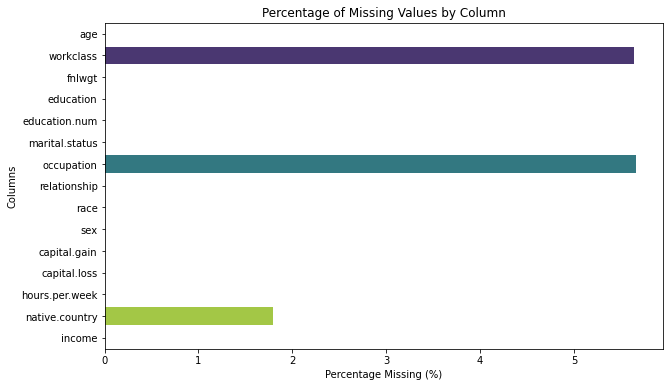

In [11]:
# plotting the missing values according to percentages for better visualization
missing_percentage = (df.isnull().mean() * 100).round(2)

# Create a bar plot to visualize missing values
plt.figure(figsize=(10, 6))
sns.barplot(x=missing_percentage, y=missing_percentage.index, palette='viridis')
plt.title('Percentage of Missing Values by Column')
plt.xlabel('Percentage Missing (%)')
plt.ylabel('Columns')


In [12]:
categorical_columns = ['workclass', 'occupation', 'native.country']

# Function to display unique classes and their counts for a column
def display_unique_classes(column_name):
    unique_classes = df[column_name].unique()
    num_classes = len(unique_classes)
    class_counts = df[column_name].value_counts()

    print(f"Column: {column_name}")
    print(f"Number of Unique Classes: {num_classes}")
    print("Unique Classes:")
    for class_label in unique_classes:
        print(f"- {class_label}: {class_counts.get(class_label, 0)} records")
    print("\n")

# Loop through the categorical columns and display unique classes and counts
for column_name in categorical_columns:
    display_unique_classes(column_name)

Column: workclass
Number of Unique Classes: 9
Unique Classes:
- nan: 0 records
- Private: 22696 records
- State-gov: 1298 records
- Federal-gov: 960 records
- Self-emp-not-inc: 2541 records
- Self-emp-inc: 1116 records
- Local-gov: 2093 records
- Without-pay: 14 records
- Never-worked: 7 records


Column: occupation
Number of Unique Classes: 15
Unique Classes:
- nan: 0 records
- Exec-managerial: 4066 records
- Machine-op-inspct: 2002 records
- Prof-specialty: 4140 records
- Other-service: 3295 records
- Adm-clerical: 3770 records
- Craft-repair: 4099 records
- Transport-moving: 1597 records
- Handlers-cleaners: 1370 records
- Sales: 3650 records
- Farming-fishing: 994 records
- Tech-support: 928 records
- Protective-serv: 649 records
- Armed-Forces: 9 records
- Priv-house-serv: 149 records


Column: native.country
Number of Unique Classes: 42
Unique Classes:
- United-States: 29170 records
- nan: 0 records
- Mexico: 643 records
- Greece: 29 records
- Vietnam: 67 records
- China: 75 reco

From the output we can see that the column workclass and native.country has mode significantly closer to the total values. Hence we can replace the missing values for the column workclass by mode. The columns occupation has a variety of unique classes and mode is not significant hence, we drop the records of that column. In case of native.country also we have a significant mode hence, we replace the missing values by mode.




In [13]:
# calculating the mode for workclass and native.country
m_w = df.workclass.mode()[0]
m_n = df['native.country'].mode()[0]

# replacing the missing values with mode for both the columns
df['workclass'].fillna(m_w,inplace = True)
df['native.country'].fillna(m_n,inplace = True)

#dropping rows for the occupation column
df.dropna(subset=['occupation'],inplace = True)

# printing missing values
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

# Analysis of numerical and categorical variables

**Numerical Variables**

In [14]:
# creating a list of columns which are numerical
num_col = df.select_dtypes(include=['int64','float64']).columns.tolist()

#printing num_col
print(num_col)

['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week']


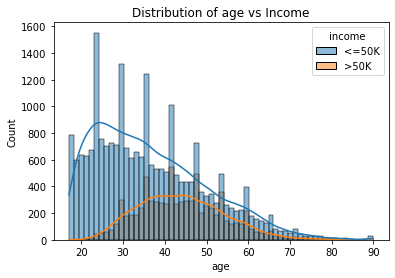

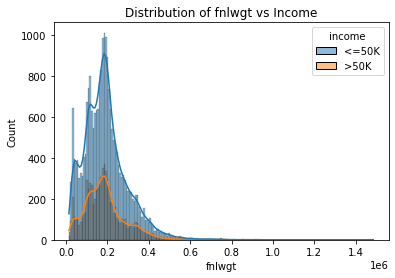

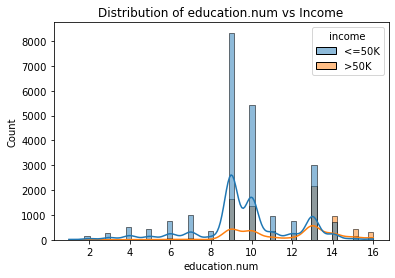

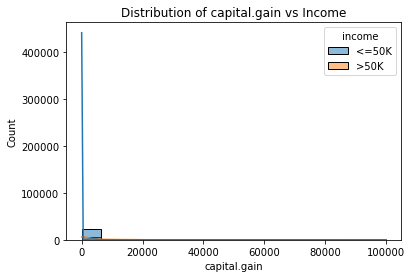

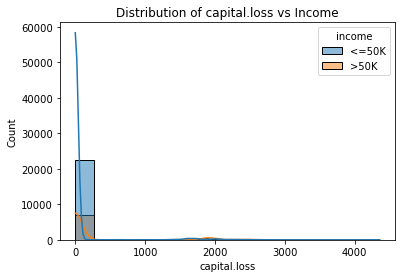

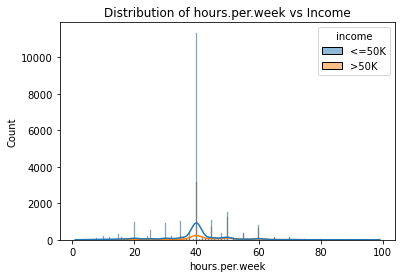

In [15]:
# plotting histograms for seeing the distributions of numerical variables
for col in num_col:
  sns.histplot(data=df, x = col, hue = 'income',kde=True)
  plt.title(f'Distribution of {col} vs Income')
  plt.show()
  print("\n")


From the above histograms plots we make the following observations:

1. For the age variable, for the income <=50k the distribution is postively skewed. Hence, there maybe a chance of outliers. For >50k i.e the plot in the orange color the distribution is slightly postively skewed.
2. For the finalweight attribute we can see that the graph is clearly postively skewed for all values of income. Hence, there may be a chance of outliers.
3. The education.num variable is not skewed neither normal. Though, we can see that for the value 9 we have max count for <=50k and then for 10 and others. For >50k the distribution is comparitively even but still not normal.
4. The hours per week has a pretty even distribution but on a relatively smaller scale. Tho we have a peak at 40. So there maybe chance of outliers.
5. For capital-gain and capital-loss we have all values almost same concentrated near zero and for capital-loss very few values concentrated near 2000. Hence, we can infer that both these parameters maybe redundant for our model as they don't have much information.

In [16]:
# dropping capital-gain and capital-loss columns
df.drop(['capital.gain','capital.loss'],axis=1,inplace=True)

# verify that columns have been dropped
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'hours.per.week', 'native.country', 'income'],
      dtype='object')

We dropped capital-gain and capital-loss columns as they seem redundant for our model having a biased distribution.

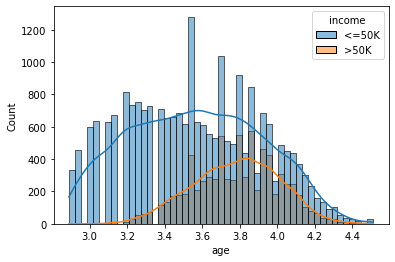

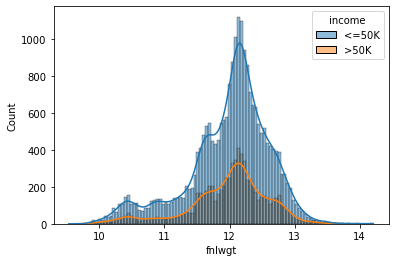

In [17]:
# create a list of columns for applying log transformations
log_list = ['age','fnlwgt']

# applying log transformation to the desired columns
for col in log_list:
  df[col] = np.log1p(df[col])

# plotting a histogram to verify the distribution
for col in log_list:
  sns.histplot(data=df,x=col,hue='income',kde=True)
  plt.show()


After applying the log transformation we can see that the distributions of age and final-weight are much more even and closer to normal than before.

**Analyzing categorical features**

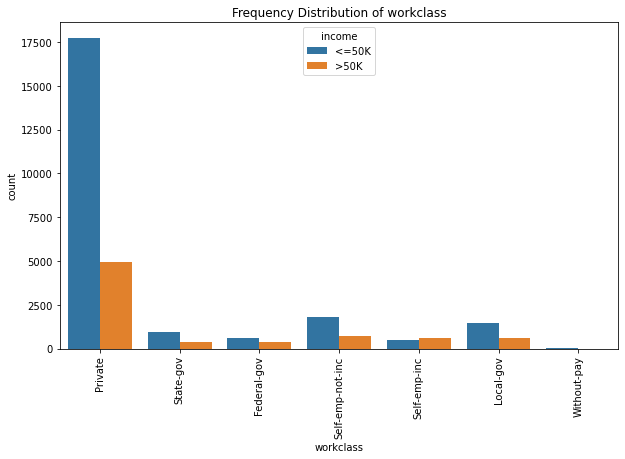

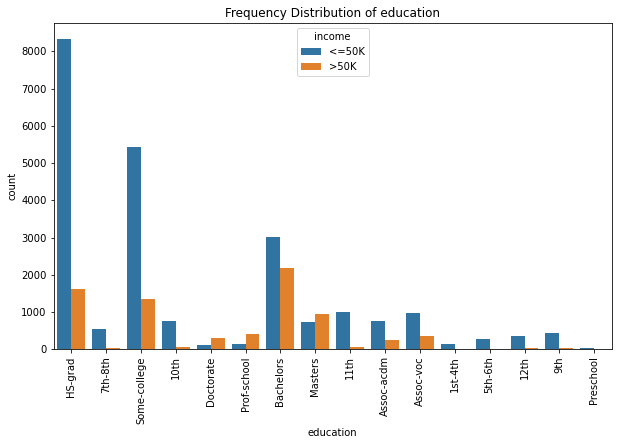

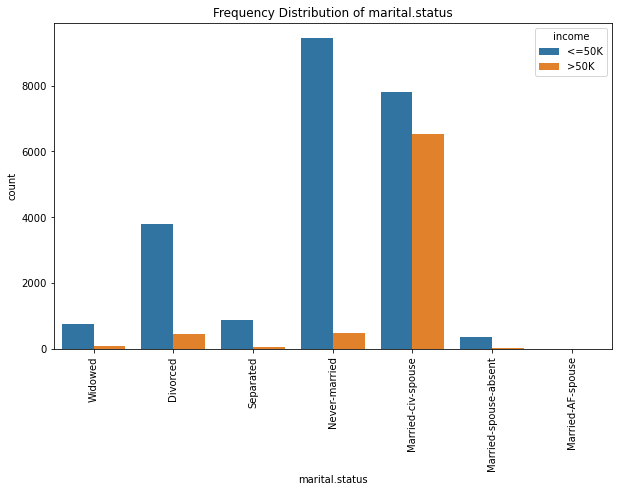

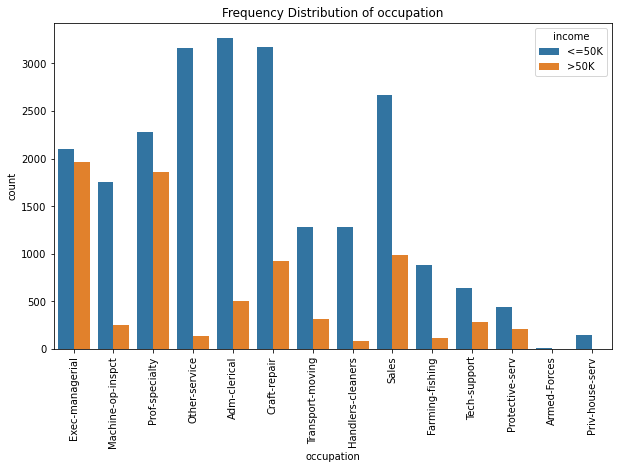

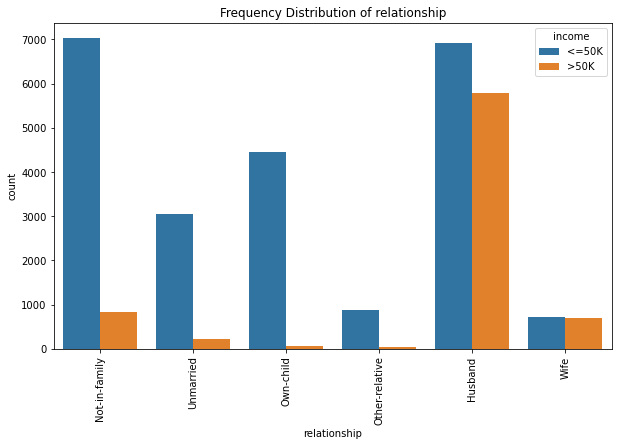

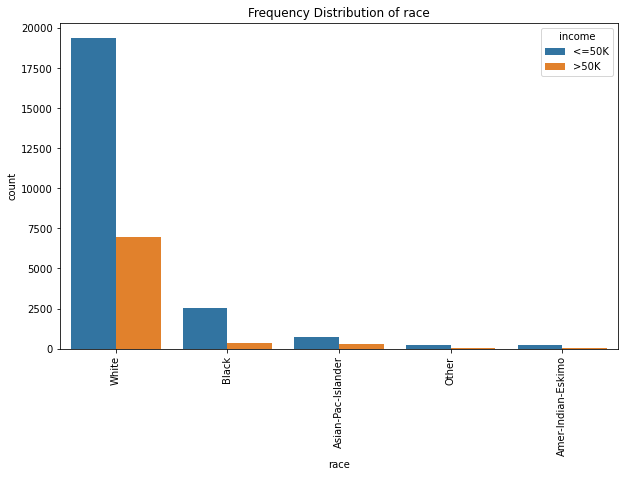

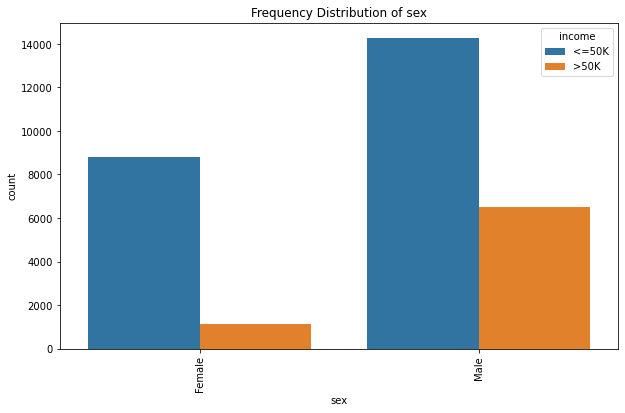

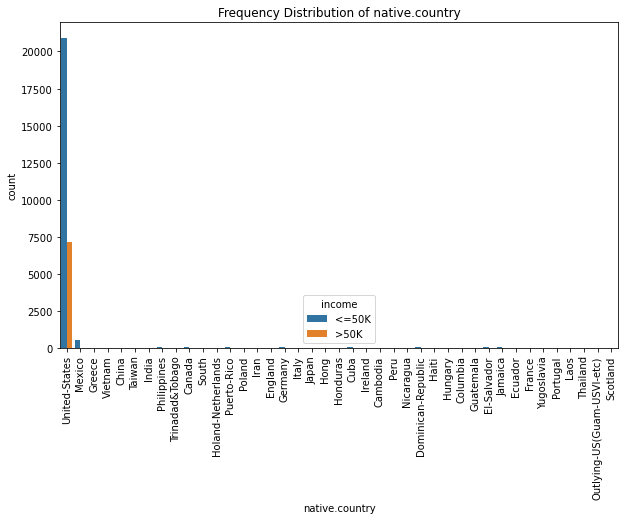

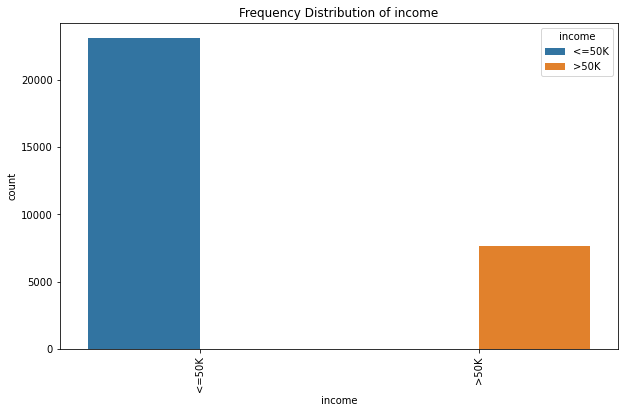

In [18]:
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()


# plotting frequency distribution for categorical variables

for col in categorical_cols:
  plt.figure(figsize=(10,6))
  sns.countplot(data=df,x=col,hue='income')
  plt.title(f'Frequency Distribution of {col}')
  plt.xticks(rotation=90)
  plt.show()
  print("\n")

From the above plots we can make the following observations

1. Workclass: In all categories except self-employed catrgories, no of people <=50k income are more than the no of the people having income >50k. Most people that are in private workclass have income less than 50k, relatively, in comparison to people who have salary greater than 50k. In all other categories the ratio of income is comparable.

2. Education: In this feature we can clearly see that the people who have a bachelors degree have a decent salary. The number of people who ahave income >50k are almost at par with the number of people earning <=50k. It seems that the people who have a doctorate degree and school professors, most of them have an earning of >50k which is pretty evident in real life. It is quite obvious that the people who are students or in school earn <=50k.

3. Marital-status: The no of people who have a civilian spouse and earn more than 50k are comparable in numer to the number of people less than 50k. In general, there are very few people who are married to a spouse who is in armed forces.

4. Occupation: From the graph we can infer that no of people in managerial roles earning >50k are almost equal to the number of people earning <=50k which are the likely numbers for salaries in such roles. The people in professor speciality show similar pattern. The number of people in armed forces in total are very less in number, but among them most of them earn <=50k. The people in private house service earn mostly <=50k.

5. Relationship: Basically the people who are married have a decent income both in case of husband and wife. It is quite evident that their own child may earn less as he/she is yet to have a full time job at such a young age. In all other scenarios no of people earning <=50k are much more than the number of people earning >50k.

6. Native-country: Most of the people in the dataset are from USA i.e more than 70 percent. In USA, most people seem to earn <=50k. All the other countries have very less number of people in the dataset.







In [19]:
categorical_cols.pop()
categorical_cols

['workclass',
 'education',
 'marital.status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native.country']

# Feature Engineering

**Heatmap**

In [20]:
# converting the target value to numerical by mapping it to 0 and 1
# so that we can incorporate it in the heatmap

df['income']=df['income'].map({'<=50K': 0, '>50K': 1})

Text(0.5, 1.0, ' Correlation heatmap')

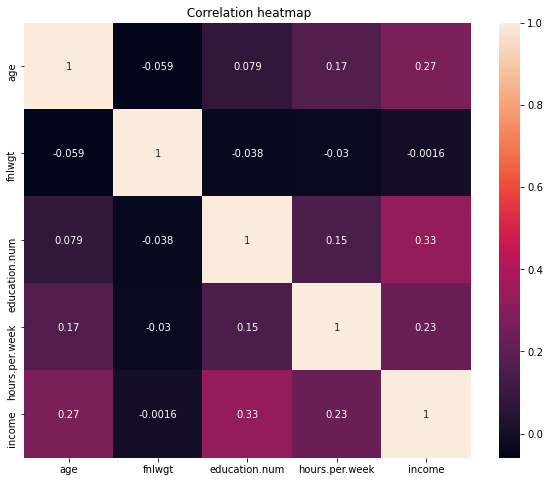

In [21]:
# generating the correlation matrix
cm = df.corr()

# generating the heatmap from correlation matrix
plt.figure(figsize=(10,8))
heatmap = sns.heatmap(cm, annot=True)
plt.title(" Correlation heatmap")


From the heatmap, we observe that all the variables have significant correlation with our target variable income. Hence they are some or the other way related to the target variable and the target variable is dependent on them. Also, there isn't very high correlation between the independent variables, therefore there is no scope for Principal Component Analysis or Dimensionality reduction. There is no multicollinearity.

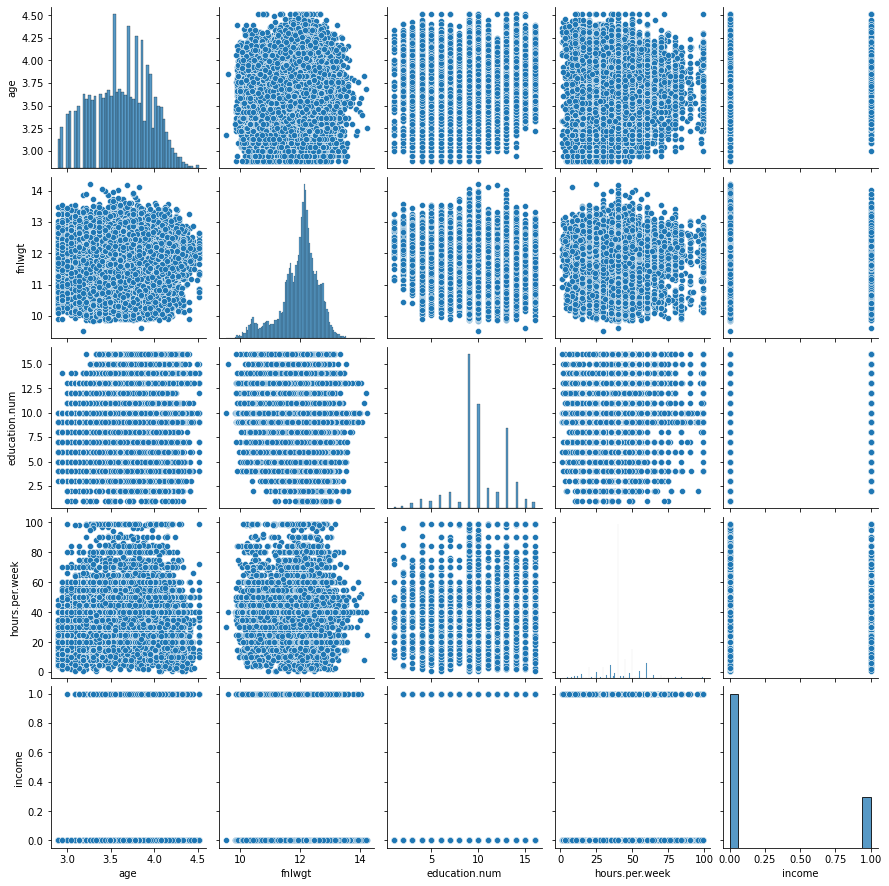

In [22]:
plt = sns.pairplot(data=df)
# plt.show(

# Model Implementation

Now we are done with data pre-processing and feature engineering. Now we will employ various Machine Learning algorithms to fit our dataset, analyze the accuracy metrics and eventually decide which model fits our data best and how accurate it is.

In [23]:
# splitting the  data into X and y variables where X is independent variables and y is target variable
X = df.drop(['income'],axis=1)
y = df['income']

# print(X.shape)

# X.head()


In [24]:
y.head()

1    0
3    0
4    0
5    0
6    0
Name: income, dtype: int64

In the dataset, we don't have the data for training and testing seperately. Hence, we will split the data into training and testing sets using the in-built train test split functionality of sklearn.


In [25]:
# splitting the data into train and test split
from sklearn.model_selection import train_test_split

# splitting the data into train and test in the ratio 70:30
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state = 42)



Now as the categorical columns don't have numerical values, they cannot be fed into the model. Hence we will need to encode those values. We will use label encoder library here to encode the values.

In [26]:
#importing neccessary libraries
from sklearn import preprocessing

# label encoding transform
for col in categorical_cols:
  le = preprocessing.LabelEncoder()
  X_train[col] = le.fit_transform(X_train[col])
  X_test[col] = le.fit_transform(X_test[col])




In [27]:
X_train.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,hours.per.week,native.country
31369,3.610918,2,11.031319,15,10,2,2,0,4,1,60,38
31013,3.044522,2,11.781738,0,6,4,5,3,4,1,40,38
1594,3.761200,1,12.106175,0,6,2,5,0,4,1,40,38
2979,4.219508,1,12.164214,9,13,0,0,4,2,0,35,38
5398,3.295837,2,12.181298,11,9,4,11,1,3,1,40,38


For the numerical columns we need to apply feature scaling. Feature scaling is basically transforming the values of all numerical variables in a given range. This is neccessary as different features having different ranges can introduce a bias to the model and lead to inaccurate results. It also reduces the computation time as everything is in the range of -1 to 1. We will use StandardScaler transform here.

In [28]:
# importing neccesary libraries
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# transform
X_train = pd.DataFrame(scaler.fit_transform(X_train))
X_test = pd.DataFrame(scaler.fit_transform(X_test))



# Modelling

Now we will implement various models according to the type of dataset. In our case, the target variable is categorical in nature. Secondly, we have sufficient data or large amount of data to fit. So intuitively, we have to fit such models that are complex in nature and can handle such large amounts of data.

**Logistic Regression**

In [29]:
# importing model libraries
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)

# predicting test cases
y_pred = model.predict(X_test)
print(y_test)

16494    0
22678    1
14600    0
10095    0
4346     0
        ..
20117    0
6966     0
9755     0
16642    0
11070    0
Name: income, Length: 9216, dtype: int64


In [30]:
# printing the classification report to analyze model performance
from sklearn import metrics
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.93      0.88      6932
           1       0.66      0.41      0.50      2284

    accuracy                           0.80      9216
   macro avg       0.74      0.67      0.69      9216
weighted avg       0.78      0.80      0.78      9216



The classification report indicates that the model is accurate with classifying people who have income <=50k. On the other hand, the model poorly performs in classifying the people with income >50k. The recall being 0.41. It means out of the actual predictions of class 1 (income >50k) the model can correctly predict 41% of the records as true. Hence, it rather predicts people actually having income >50k as <=50k.

In [31]:
from sklearn.metrics import accuracy_score

test_score = accuracy_score(y_test, model.predict(X_test)) * 100
train_score = accuracy_score(y_train, model.predict(X_train)) * 100

results_df = pd.DataFrame(data=[["Logistic Regression", train_score, test_score]],
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,80.173937,80.034722


The training and testing accuracy is consistent. Hence, the model does not overfit the data.

In [32]:
#importing neccessary libraries
from sklearn.tree import DecisionTreeClassifier

model=DecisionTreeClassifier()
model.fit(X_train,y_train)

dt=model.predict(X_test)

from sklearn import metrics

print(metrics.classification_report(y_test,dt))

              precision    recall  f1-score   support

           0       0.85      0.84      0.84      6932
           1       0.53      0.55      0.54      2284

    accuracy                           0.77      9216
   macro avg       0.69      0.70      0.69      9216
weighted avg       0.77      0.77      0.77      9216



The metrics show that the model performs poorly for class1 (income >50k) unlike of class 0 suggesting this model is not a good fit for our data.

In [33]:
from sklearn.metrics import accuracy_score

test_score = accuracy_score(y_test, model.predict(X_test)) * 100
train_score = accuracy_score(y_train, model.predict(X_train)) * 100

results_df = pd.DataFrame(data=[["Decision Tree Classifier", train_score, test_score]],
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Decision Tree Classifier,99.990699,76.736111


There is a significant difference between training and testing accuracy. The model clearly overfits the data.

In [34]:
from sklearn.svm import SVC
model=SVC(kernel="rbf")
model.fit(X_train,y_train)
sv=model.predict(X_test)
from sklearn import metrics
print(metrics.classification_report(y_test,sv))

              precision    recall  f1-score   support

           0       0.85      0.93      0.89      6932
           1       0.71      0.49      0.58      2284

    accuracy                           0.82      9216
   macro avg       0.78      0.71      0.73      9216
weighted avg       0.81      0.82      0.81      9216



The model performs well for class 0. But in case of class 1, the recall is 0.49. It means that out of actual positive predictions, the model correctly predicts 49% of the data.

In [35]:

from sklearn.metrics import accuracy_score

test_score = accuracy_score(y_test, model.predict(X_test)) * 100
train_score = accuracy_score(y_train, model.predict(X_train)) * 100

results_df = pd.DataFrame(data=[["Support Vector Classifier", train_score, test_score]],
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Support Vector Classifier,83.262022,82.291667


The training and testing accuracies are similar. So the model does not overfit the data.

In [36]:
import xgboost as xgb
from sklearn.metrics import classification_report

# creating an xgboost classifier

xgb_model = xgb.XGBClassifier(objective = "binary:logistic",random_state=42,use_label_encoder=False)

xgb_model.fit(X_train,y_train)

xgb_pred = xgb_model.predict(X_test)

accuracy = accuracy_score(y_test,xgb_pred)

print("Accuracy",accuracy)

print(classification_report(y_test, y_pred))

Accuracy 0.7894965277777778
              precision    recall  f1-score   support

           0       0.83      0.93      0.88      6932
           1       0.66      0.41      0.50      2284

    accuracy                           0.80      9216
   macro avg       0.74      0.67      0.69      9216
weighted avg       0.78      0.80      0.78      9216



The model performs well for class 0. Still there is room for improveement in class 1 predictions

In [37]:
from sklearn.metrics._plot.confusion_matrix import confusion_matrix
from sklearn.ensemble import AdaBoostClassifier
ada_model = AdaBoostClassifier(
    n_estimators=50,  # Number of weak learners (decision trees)
    random_state=42,
)
ada_model.fit(X_train, y_train)

ada_pred =ada_model.predict(X_test)

print("Classification Report")
print(classification_report(y_test,ada_pred))


print("Confusion matrix")
print(confusion_matrix(y_test,ada_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.86      0.92      0.89      6932
           1       0.70      0.56      0.62      2284

    accuracy                           0.83      9216
   macro avg       0.78      0.74      0.76      9216
weighted avg       0.82      0.83      0.83      9216

Confusion matrix
[[6381  551]
 [ 999 1285]]


# Handling data imbalance using SMOTE

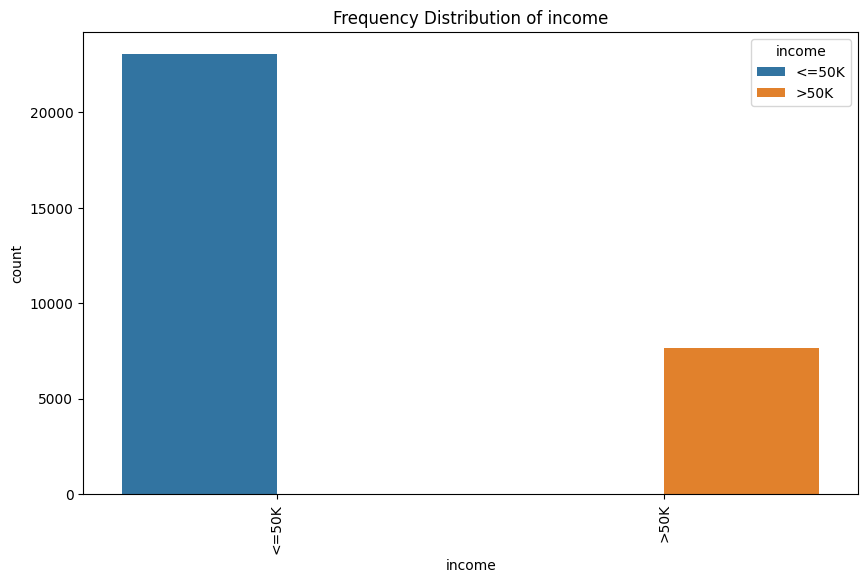

We can see from the above prediction stats that each and every model performs well for class 0 and not so well for class 1. While visualizing the distributions of our target variable income, we can clearly see that we have almost 22k datapoints for class 0  in comparsion to class 1 which has around 8k data points. From these results, it is evident that this is a case of data imbalance. Data imbalance can lead to overfitting and poor precision and recall for the minority class which is justified by our prediction results of various Machine Learning models above. Hence, in order to overcome this problem, we use SMOTE(Synthetic Minority Oversampling Technique). This function creates artifical samples of the data of the minority class in order to handle the data imbalance.

In [38]:
from sklearn.model_selection import train_test_split

# splitting the data into train and test in the ratio 70:30
X_trainr, X_testr,y_trainr,y_testr = train_test_split(X,y,test_size=0.3,random_state = 42)

from sklearn import preprocessing

# label encoding transform
for col in categorical_cols:
  le = preprocessing.LabelEncoder()
  X_trainr[col] = le.fit_transform(X_trainr[col])
  X_testr[col] = le.fit_transform(X_testr[col])




We use the sampling strategy = 0.40 which means 40 percent of the majority class and 60 percent of the minority class samples are taken.

In [39]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42,sampling_strategy=0.40)
X_train_resampled, y_train_resampled = smote.fit_resample(X_trainr, y_trainr)

In [40]:
#feature scaling

# importing neccessary libraries
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# transform
X_train_resampled = pd.DataFrame(scaler.fit_transform(X_train_resampled))
X_testr = pd.DataFrame(scaler.fit_transform(X_testr))




In [41]:
from sklearn.metrics._plot.confusion_matrix import confusion_matrix
from sklearn.ensemble import AdaBoostClassifier
ada_model = AdaBoostClassifier(
    n_estimators=50,  # Number of weak learners (decision trees)
    random_state=42,
)
ada_model.fit(X_train_resampled, y_train_resampled)

ada_predr = ada_model.predict(X_testr)

print("Classification Report")
print(classification_report(y_testr,ada_predr))


print("Confusion matrix")
print(confusion_matrix(y_testr,ada_predr))

Classification Report
              precision    recall  f1-score   support

           0       0.88      0.89      0.89      6932
           1       0.65      0.63      0.64      2284

    accuracy                           0.83      9216
   macro avg       0.77      0.76      0.76      9216
weighted avg       0.82      0.83      0.83      9216

Confusion matrix
[[6167  765]
 [ 836 1448]]


From the above results we can see that employing SMOTE has improves our results for the minority class. The precision and recall values are 65 and 63 indicating the model is consistent and gives better predictions.

In [42]:
import xgboost as xgb
from sklearn.metrics import classification_report

# creating an xgboost classifier

xgb_model = xgb.XGBClassifier(objective = "binary:logistic",random_state=42,use_label_encoder=False)

xgb_model.fit(X_train_resampled,y_train_resampled)

xgb_predr = xgb_model.predict(X_testr)

accuracy = accuracy_score(y_testr,xgb_predr)

print("Accuracy",accuracy)

print(classification_report(y_testr, xgb_predr))

Accuracy 0.6418185763888888
              precision    recall  f1-score   support

           0       0.94      0.56      0.70      6932
           1       0.40      0.89      0.55      2284

    accuracy                           0.64      9216
   macro avg       0.67      0.72      0.63      9216
weighted avg       0.80      0.64      0.66      9216



In [43]:
import lightgbm as lgb

train_data = lgb.Dataset(X_train_resampled, label=y_train_resampled)

params = {
    "objective": "binary",  # For binary classification
    "boosting_type": "gbdt",  # Gradient Boosting Decision Tree
    "metric": "binary_logloss",  # Evaluation metric
    "num_leaves": 31,  # Maximum number of leaves in a tree
    "learning_rate": 0.05,  # Learning rate
    "feature_fraction": 0.9,  # Fraction of features to be used in each tree
    "bagging_fraction": 0.8,  # Fraction of data to be used in each tree
    "bagging_freq": 5,  # Frequency of bagging
}



num_round = 100  # Number of boosting rounds (iterations)

# Train the model
lgb_model = lgb.train(params, train_data, num_round)

lgb_predr = lgb_model.predict(X_testr, num_iteration=lgb_model.best_iteration)
lgb_predr_binary = [1 if pred >= 0.5 else 0 for pred in lgb_predr]

# Evaluate the model
accuracy = accuracy_score(y_testr, lgb_predr_binary)
print("Accuracy:", accuracy)
print(classification_report(y_testr, lgb_predr_binary))
print(confusion_matrix(y_test, lgb_predr_binary))

[LightGBM] [Info] Number of positive: 6454, number of negative: 16136
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000625 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 674
[LightGBM] [Info] Number of data points in the train set: 22590, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.285702 -> initscore=-0.916353
[LightGBM] [Info] Start training from score -0.916353
Accuracy: 0.8314887152777778
              precision    recall  f1-score   support

           0       0.89      0.89      0.89      6932
           1       0.66      0.67      0.66      2284

    accuracy                           0.83      9216
   macro avg       0.77      0.78      0.77      9216
weighted avg       0.83      0.83      0.83      9216

[[6141  791]
 [ 762 1522]]


Among all the Machine Learning models we used to make predictions, LightGBM gives the best results. It performs well for class 0. It performs decently for class 1 predictions as well. The precision and recall are 0.66 and 0.67 indicating the model is consistent with predictions of class1. Hence, we can use it as our final model to make predictions

# Outliers

As we can see in the above model LightGBM we get a decent precision and recall for both classes. In that case, we have not yet removed the outliers. We will now try to remove outliers and see the difference it makes in precison and recall.

In [44]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
num_cols.pop()
num_cols

['age', 'fnlwgt', 'education.num', 'hours.per.week']

In [45]:
import pandas as pd

# Assuming you have a DataFrame 'df' with your dataset

# Define a function to remove outliers using IQR
def remove_outliers_iqr(df, column, k=1.5):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - k * IQR
    upper_bound = Q3 + k * IQR

    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]



# Define the outlier factor 'k'
k = 1.5

# Create a new DataFrame without outliers
df_cleaned = df.copy()
for column in num_cols:
    df_cleaned = remove_outliers_iqr(df_cleaned, column, k)

In [46]:
X_o = df_cleaned.drop(['income'],axis=1)
y_o = df_cleaned['income']

# splitting the data into train and test split
from sklearn.model_selection import train_test_split

# splitting the data into train and test in the ratio 70:30
X_train_o, X_test_o,y_train_o,y_test_o = train_test_split(X_o,y_o,test_size=0.3,random_state = 42)

from sklearn import preprocessing

# label encoding transform
for col in categorical_cols:
  le = preprocessing.LabelEncoder()
  X_train_o[col] = le.fit_transform(X_train_o[col])
  X_test_o[col] = le.fit_transform(X_test_o[col])

# importing neccesary libraries
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# transform
X_train_o = pd.DataFrame(scaler.fit_transform(X_train_o))
X_test_o = pd.DataFrame(scaler.fit_transform(X_test_o))

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42,sampling_strategy=0.40)
X_train_resampled_o, y_train_resampled_o = smote.fit_resample(X_train_o, y_train_o)

import lightgbm as lgb

train_data_o = lgb.Dataset(X_train_resampled_o, label=y_train_resampled_o)

params = {
    "objective": "binary",  # For binary classification
    "boosting_type": "gbdt",  # Gradient Boosting Decision Tree
    "metric": "binary_logloss",  # Evaluation metric
    "num_leaves": 31,  # Maximum number of leaves in a tree
    "learning_rate": 0.05,  # Learning rate
    "feature_fraction": 0.9,  # Fraction of features to be used in each tree
    "bagging_fraction": 0.8,  # Fraction of data to be used in each tree
    "bagging_freq": 5,  # Frequency of bagging
}



num_round = 100  # Number of boosting rounds (iterations)

# Train the model
lgb_model = lgb.train(params, train_data_o, num_round)

lgb_predo = lgb_model.predict(X_test_o, num_iteration=lgb_model.best_iteration)
lgb_predo_binary = [1 if pred >= 0.5 else 0 for pred in lgb_predo]

# Evaluate the model
accuracy = accuracy_score(y_test_o, lgb_predo_binary)
print("Accuracy:", accuracy)
print(classification_report(y_test_o, lgb_predo_binary))
print(confusion_matrix(y_test_o, lgb_predo_binary))


# df_cleaned.head()

[LightGBM] [Info] Number of positive: 4415, number of negative: 11039
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000434 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 826
[LightGBM] [Info] Number of data points in the train set: 15454, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.285687 -> initscore=-0.916427
[LightGBM] [Info] Start training from score -0.916427
Accuracy: 0.7977492966552048
              precision    recall  f1-score   support

           0       0.89      0.82      0.86      4686
           1       0.60      0.73      0.66      1712

    accuracy                           0.80      6398
   macro avg       0.75      0.78      0.76      6398
weighted avg       0.81      0.80      0.80      6398

[[3860  826]
 [ 468 1244]]


**Precision-Recall Curve**

The P-R curve is used in Machine Learning in order to get a better insight of the model's performance with data imbalance and handling outliers. We will plot a P-R curve for data with and without outliers. The area under the P-R curve is called the AUC score. The more the AUC the better the model performs and the better is the precision and recall.

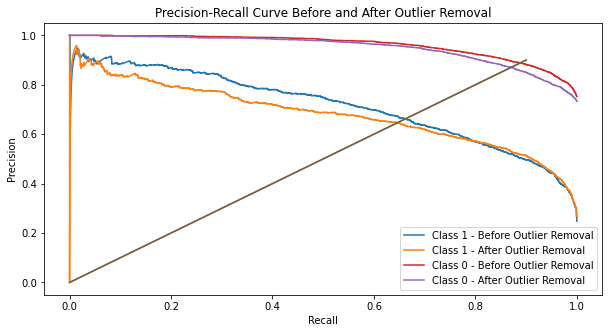

In [47]:


from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
x= np.arange(0,1,0.1)
y = np.arange(0,1,0.1)
p1, r1, _ = precision_recall_curve(y_testr, lgb_predr)
p2, r2, _ = precision_recall_curve(y_test_o, lgb_predo)

plt.figure(figsize=(10, 5))

# Plot Precision-Recall Curve for Class 0
plt.plot(r1, p1, label="Class 1 - Before Outlier Removal")
plt.plot(r2,p2,label="Class 1 - After Outlier Removal")
plt.plot(x,y)


# Plot Precision-Recall Curve for Class 1


p3, r3, _ = precision_recall_curve(1 - y_testr, 1 - lgb_predr)  # Invert labels for Class 1
p4, r4, _ = precision_recall_curve(1 - y_test_o, 1 - lgb_predo)  # Invert labels for Class 1
plt.plot(r3, p3, label="Class 0 - Before Outlier Removal")
plt.plot(r4, p4, label="Class 0 - After Outlier Removal")
plt.plot(x,y)

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve Before and After Outlier Removal")
plt.legend()
plt.show()


From the above precision recall curve we can conclude the following:

1. For class 0 i.e the people with income <=50k for which we have ample amount of data. The P-R curve is almost the same before and after outlier removal. The area under curve(AUC) is more than that of after removing outliers. Hence, the class 0 has no significant change in Precion-Recall after removing outliers.

2. For class 1 i.e. the people with income >50k there is visible change in the AUC. Before removing outliers the precision and recall are 0.67 and 0.68 which suggests that the model gives consistent results. Whereas, after removing outliers we get a precision and recall of 0.60 and 0.73 respectively. This values indicate that out of the total predicted class labels having income >50k it predicts many values as >50k which aren't. This further signifies that model predicts that people actually having income >50k have income <=50k. The recall is 0.73 so out of the actual predictions of people having income <=50k model is able to predict 73% of the people correct. So it is better we keep outliers as is for consistent predictions of model.

# Question and Answers

Answer the following questions:

* What are the data types? (Only numeric and categorical)
     
    The numerical columns are:
    
    1.   age
    2.   fnlwgt
    3.   education.num
    4.   capital.gain
    5.   capital.loss
    6.   hours.per.week

    The categorical columns are:
    

    1.  workclass
    2.  education
    3.  marital.status
    4.  occupation
    5.  relationship
    6.  race
    7.  sex
    8.  native.country
    9.  income
    
    

* Are there missing values?
    
    Yes, there are missing values but they are encoded as '?' and not nan. Hence, we replace '?' with nan. 
    
   

* What are the likely distributions of the numeric variables?
    
    Refer to Analysis of numerical and categorical variables section.

* Which independent variables are useful to predict a target (dependent variable)? (Use at least three methods)
    
     The useful variables are age, workclass, fnlwgt, education, education.num,
     marital.status, occupation, relationship, race, sex,
     hours.per.week, native.country.
    

* Which independent variables have missing data? How much? 
    
    age                  0
    workclass         1836
    fnlwgt               0
    education            0
    education.num        0
    marital.status       0
    occupation        1843
    relationship         0
    race                 0
    sex                  0
    capital.gain         0
    capital.loss         0
    hours.per.week       0
    native.country     583
    income               0

* Do the training and test sets have the same data?
    
    No we don't have a training and testing test defined. Instead, we use train_test_split from scikit-learn
    such that 80% is training data and 20% is testing data.

* In the predictor variables independent of all the other predictor variables?

    Yes the predictor variables are independent of all other predictor variables. From the heatmap, we can clearly confirm
    that there is no scope of multicollinearity.

* Which predictor variables are the most important?
    
    A. age 
    B. workclass 
    C. fnlwgt 
    D. education 
    E. education.num
    F. marital.status 
    G. occupation 
    H. relationship 
    I. race 
    J. sex
    K. hours.per.week
    L. native.country.

    

    

* Do the ranges of the predictor variables make sense?

    Apart from capital-gain and capital-loss, all ranges make sense. As seen from plots in the notebook, we see that
    capital-gain and capital-loss have unconventional distributions. Hence, we drop that colums.
    
    

* What are the distributions of the predictor variables?

    For numerical variables:
    
    1. For the age variable, for the income <=50k the distribution is postively skewed. Hence, there maybe a chance of outliers. 
       For >50k i.e the plot in the orange color the distribution is slightly postively skewed.
    
    2. For the finalweight attribute we can see that the graph is clearly postively skewed for all values of income. Hence, 
       there may be a chance of outliers.
    
    3. The education.num variable is not skewed neither normal. Though, we can see that for the value 9 we have max count for 
       <=50k and then for 10 and others. For >50k the distribution is comparitively even but still not normal.
    
    4. The hours per week has a pretty even distribution but on a relatively smaller scale. Tho we have a peak at 40. So there 
       maybe chance of outliers.
    
    5. For capital-gain and capital-loss we have all values almost same concentrated near zero and for capital-loss very few 
       values concentrated near 2000. Hence, we can infer that both these parameters maybe redundant for our model as they don't 
       have much information.

    For categorical variables:
    
    1. Workclass: In all categories except self-employed catrgories, no of people <=50k income are more than the no of the 
       people having income >50k. Most people that are in private workclass have income less than 50k, relatively, in 
       comparison to people who have salary greater than 50k. In all other categories the ratio of income is comparable.

    2. Education: In this feature we can clearly see that the people who have a bachelors degree have a decent salary. The 
       number of people who ahave income >50k are almost at par with the number of people earning <=50k. It seems that the 
       people who have a doctorate degree and school professors, most of them have an earning of >50k which is pretty evident in 
       real life. It is quite obvious that the people who are students or in school earn <=50k.

    3. Marital-status: The no of people who have a civilian spouse and earn more than 50k are comparable in numer to the number 
       of people less than 50k. In general, there are very few people who are married to a spouse who is in armed forces.

    4. Occupation: From the graph we can infer that no of people in managerial roles earning >50k are almost equal to the number 
       of people earning <=50k which are the likely numbers for salaries in such roles. The people in professor speciality show 
       similar pattern. The number of people in armed forces in total are very less in number, but among them most of them earn 
       <=50k. The people in private house service earn mostly <=50k.

    5. Relationship: Basically the people who are married have a decent income both in case of husband and wife. It is quite 
       evident that their own child may earn less as he/she is yet to have a full time job at such a young age. In all other 
       scenarios no of people earning <=50k are much more than the number of people earning >50k.

    6. Native-country: Most of the people in the dataset are from USA i.e more than 70 percent. In USA, most people seem to earn 
       <=50k. All the other countries have very less number of people in the dataset.
    
    



# Conclusion

In this notebook, we employ various data preprocessing techniques, Exploratory Data Analysis and various machine learning models
to explore the adult census income dataset. We come across various data anomalies and we provide solutions for the same. 

# References

Help of various resources and references were taken. They are mentioned below:

   1.https://github.com/aiskunks/YouTube/blob/main/A_Crash_Course_in_Statistical_Learning/ML_Data_Cleaning_and_Feature_Selection/ML_Data_Cleaning_and_Feature_Selection_Abalone.ipynb
 
 2.https://www.kaggle.com/code/abhi011097/eda-feature-engineering-logistic-regression
 
 3.https://www.kaggle.com/code/tirendazacademy/classification-analysis-with-xgboost
 
 4.https://www.kaggle.com/code/aditimulye/adult-income-dataset-from-scratch
 
 5.sklearn documentation
 
 6.imblearn documentation
 
 7.Chatgpt
 